From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


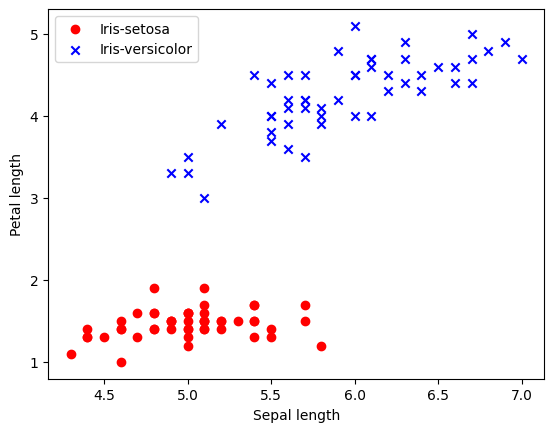

In [1]:
# import libraries used in part 1
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'   # can also import into a local path if data is downloaded
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

 # extract first 100 class labels that coresspond to 50 iris-setosa and 50 iris-versicolor

# set setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Iris-setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Iris-versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

In [2]:
# import the Adaline class from the adaline.py file
from adaline import AdalineGD

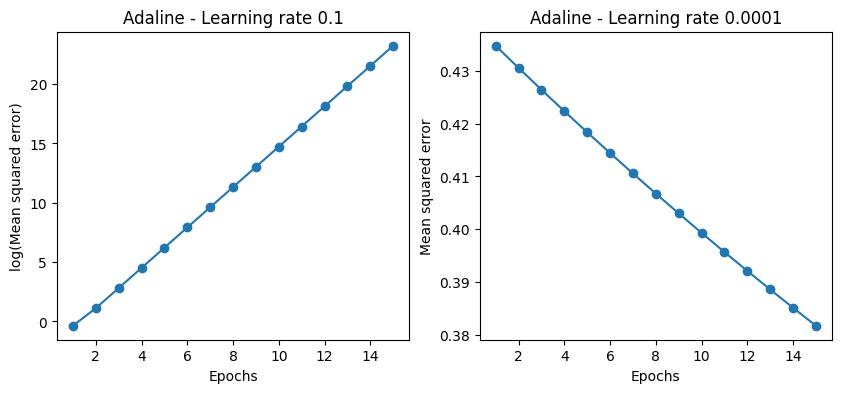

In [3]:
# plot loss against number of epochs for two different learning rates
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show() # when learning rate is too high, the loss function diverges and does not converge to a minimum. When learning rate is too low, the loss function converges very slowly.

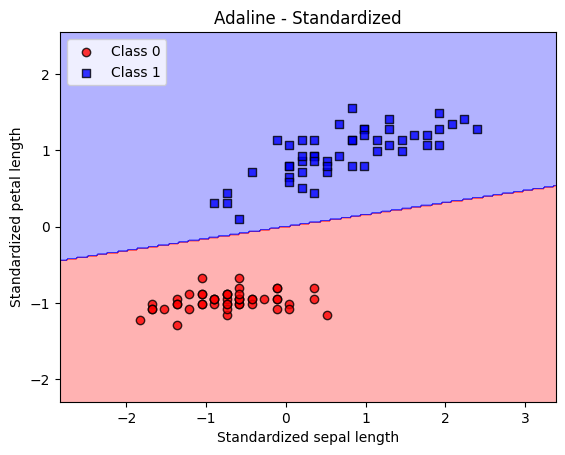

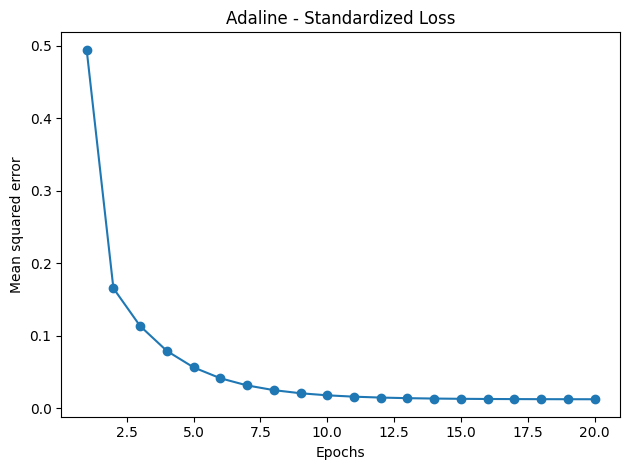

In [ ]:
# read section on standardization in notes, will implement it here:
X_std = np.copy(X)  # make a copy of the original data
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  # standardize sepal length
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  # standardize petal length
# retrain Adaline model again and now it converges with learning rate of 0.5
ada_gd = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y)
# plot the decision boundary
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.xlabel('Standardized sepal length')
plt.ylabel('Standardized petal length')
plt.legend(loc='upper left')
plt.title('Adaline - Standardized')
plt.show() 
# plot the loss function
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.title('Adaline - Standardized Loss')
plt.tight_layout()
plt.show()
# note that the MSE remains non-zero even though all flower examples were classified correctly.